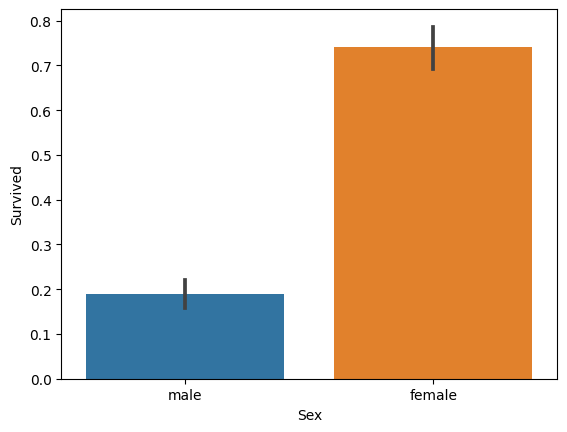

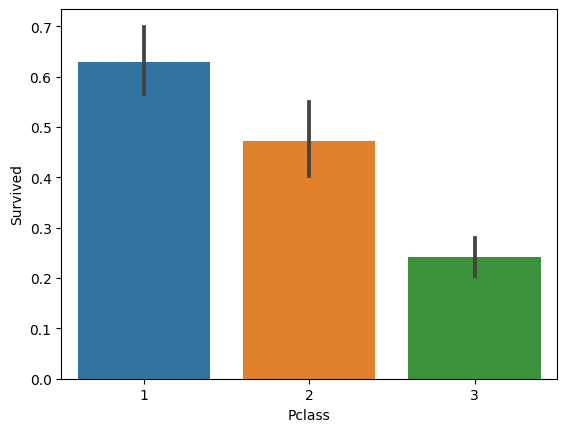

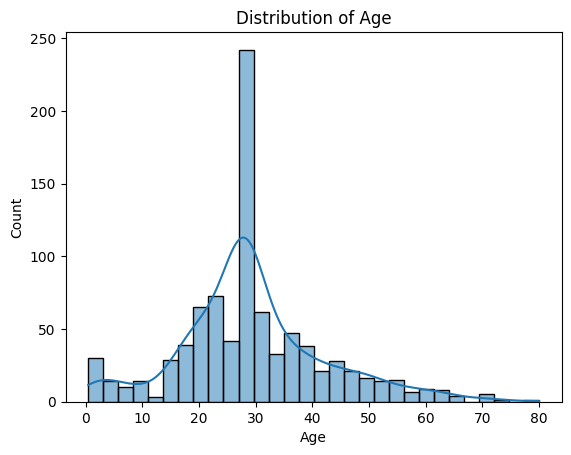

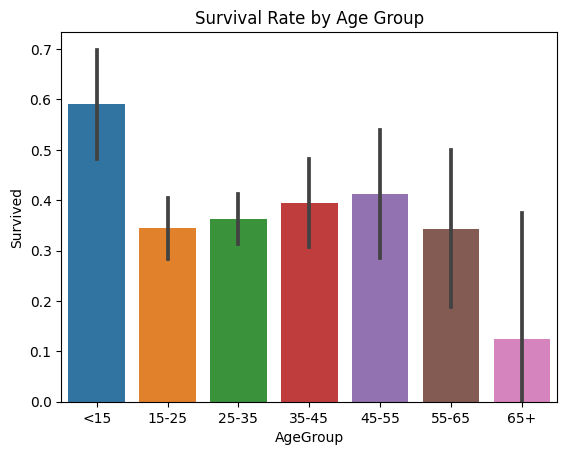

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the cleaned data
train_data = pd.read_csv('../data/processed/train.csv')

# Convert the 'Sex' column back to categorical for visualization
train_data['Sex'] = train_data['Sex_female'].apply(lambda x: 'female' if x == 1 else 'male')

# Survival rate by Sex
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.show()

# Survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.show()

# Histogram of Age
sns.histplot(data=train_data, x='Age', kde=True)
plt.title('Distribution of Age')
plt.show()

# Create age groups and calculate survival rate by age group
bins = [0, 15, 25, 35, 45, 55, 65, np.inf]
names = ['<15', '15-25', '25-35', '35-45', '45-55', '55-65', '65+']

train_data['AgeGroup'] = pd.cut(train_data['Age'], bins, labels=names)

sns.barplot(x='AgeGroup', y='Survived', data=train_data)
plt.title('Survival Rate by Age Group')
plt.show()

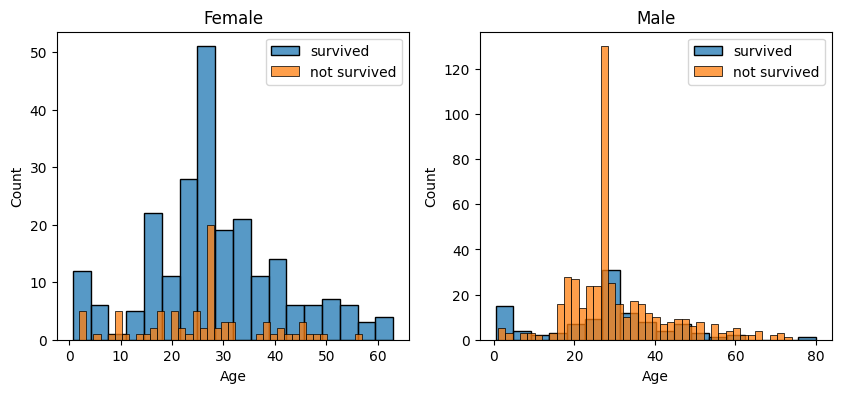

In [7]:

# Convert the 'Sex' column back to categorical for visualization
train_data['Sex'] = train_data['Sex_female'].apply(lambda x: 'female' if x == 1 else 'male')

# Separate the data into female and male
women_data = train_data[train_data['Sex'] == 'female']
men_data = train_data[train_data['Sex'] == 'male']

# Plot survival by age for female and male passengers
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax = sns.histplot(women_data[women_data['Survived']==1].Age.dropna(), bins=18, label=survived, ax=axes[0], kde=False)
ax = sns.histplot(women_data[women_data['Survived']==0].Age.dropna(), bins=40, label=not_survived, ax=axes[0], kde=False)
ax.legend()
ax.set_title('Female')

ax = sns.histplot(men_data[men_data['Survived']==1].Age.dropna(), bins=18, label=survived, ax=axes[1], kde=False)
ax = sns.histplot(men_data[men_data['Survived']==0].Age.dropna(), bins=40, label=not_survived, ax=axes[1], kde=False)
ax.legend()
_ = ax.set_title('Male')

plt.show()
